In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./climate_change_data.csv',parse_dates=['Date'])
data.head(10)

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
5,2000-01-05 04:48:36.291629162,South Nathan,Saint Helena,6.229326,392.473317,1.122210,76.368331,48.973886,30.398908
6,2000-01-06 00:58:19.549954995,Port Richardfurt,Tuvalu,21.646738,387.648437,0.058471,9.650389,11.402284,15.720944
7,2000-01-06 21:08:02.808280828,Adambury,Australia,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495
8,2000-01-07 17:17:46.066606660,Williamsonberg,Qatar,19.858114,379.618820,0.584881,6.218846,30.861949,37.519472
9,2000-01-08 13:27:29.324932493,North Thomas,Chad,14.121563,410.517072,-1.712224,15.351583,88.422794,47.922521


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


In [4]:
data.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [5]:
data.isnull().mean()*100

Date              0.0
Location          0.0
Country           0.0
Temperature       0.0
CO2 Emissions     0.0
Sea Level Rise    0.0
Precipitation     0.0
Humidity          0.0
Wind Speed        0.0
dtype: float64

In [6]:
data.shape

(10000, 9)

In [7]:
data.size

90000

In [8]:
data.sort_values(by='Date',inplace=True)

#### Extracting the date 

In [9]:
data["year"]=data.Date.dt.year
data["month"]=data.Date.dt.month
data["Day"]=data.Date.dt.day
data["hour"]=data.Date.dt.hour
data["second"]=data.Date.dt.second
data["minute"]=data.Date.dt.minute


In [10]:
 data.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed', 'year',
       'month', 'Day', 'hour', 'second', 'minute'],
      dtype='object')

In [11]:
data.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,Day,hour,second,minute
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,0,0,0
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20,43,9
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16,26,19
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12,9,29
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,8,53,38


In [12]:
data.drop(columns='Date', inplace=True)

In [27]:
data.rename(columns={"Wind Speed":"windspeed"},inplace=True)
data.head()

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,windspeed,year,month,Day,hour,second,minute
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,0,0,0
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20,43,9
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16,26,19
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12,9,29
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,8,53,38


#### Country with highest temperature 

In [28]:
country_high_temp= data[data.Temperature==data.Temperature.max()]
country_high_temp

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,windspeed,year,month,Day,hour,second,minute
5601,Bradleyport,Niger,33.976956,370.009529,-1.173126,53.160033,47.798918,16.57178,2012,11,18,7,9,27


#### Univariate analysis 

#### histplot 

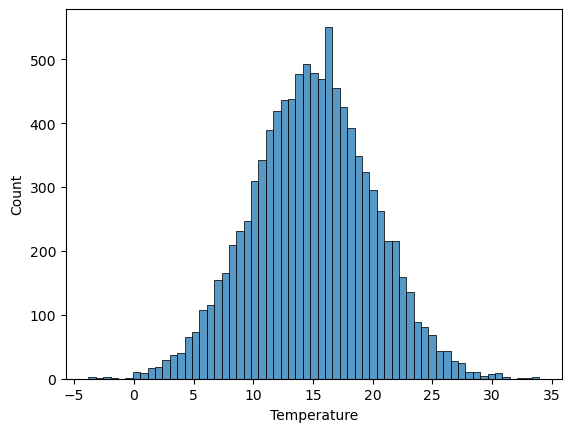

In [29]:
sns.histplot(data=data,x='Temperature')
plt.show()

#### boxplot 

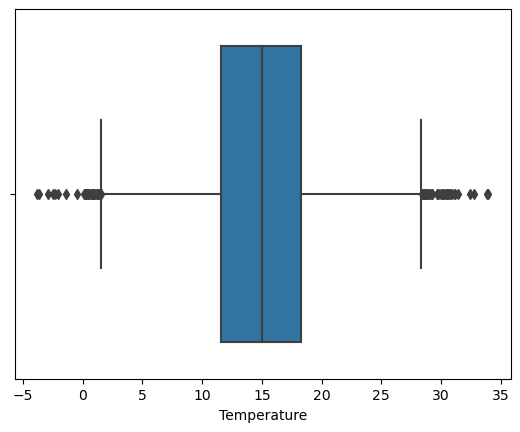

In [30]:
sns.boxplot(data=data,x='Temperature')
plt.show()

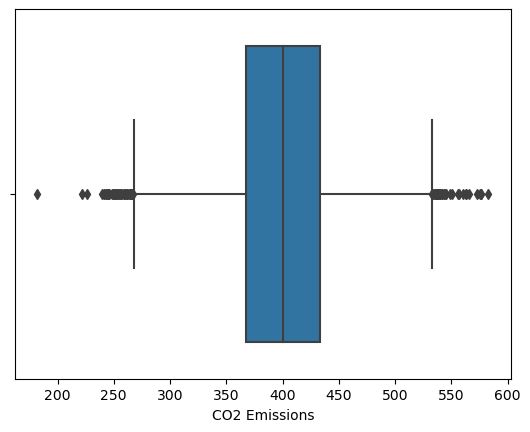

In [31]:
sns.boxplot(data=data,x='CO2 Emissions')
plt.show()

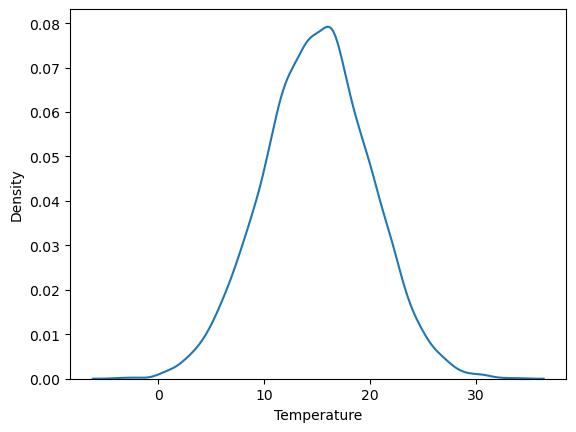

In [32]:
sns.kdeplot(data=data,x='Temperature')
plt.show()

#### Subplot 

<function matplotlib.pyplot.show(close=None, block=None)>

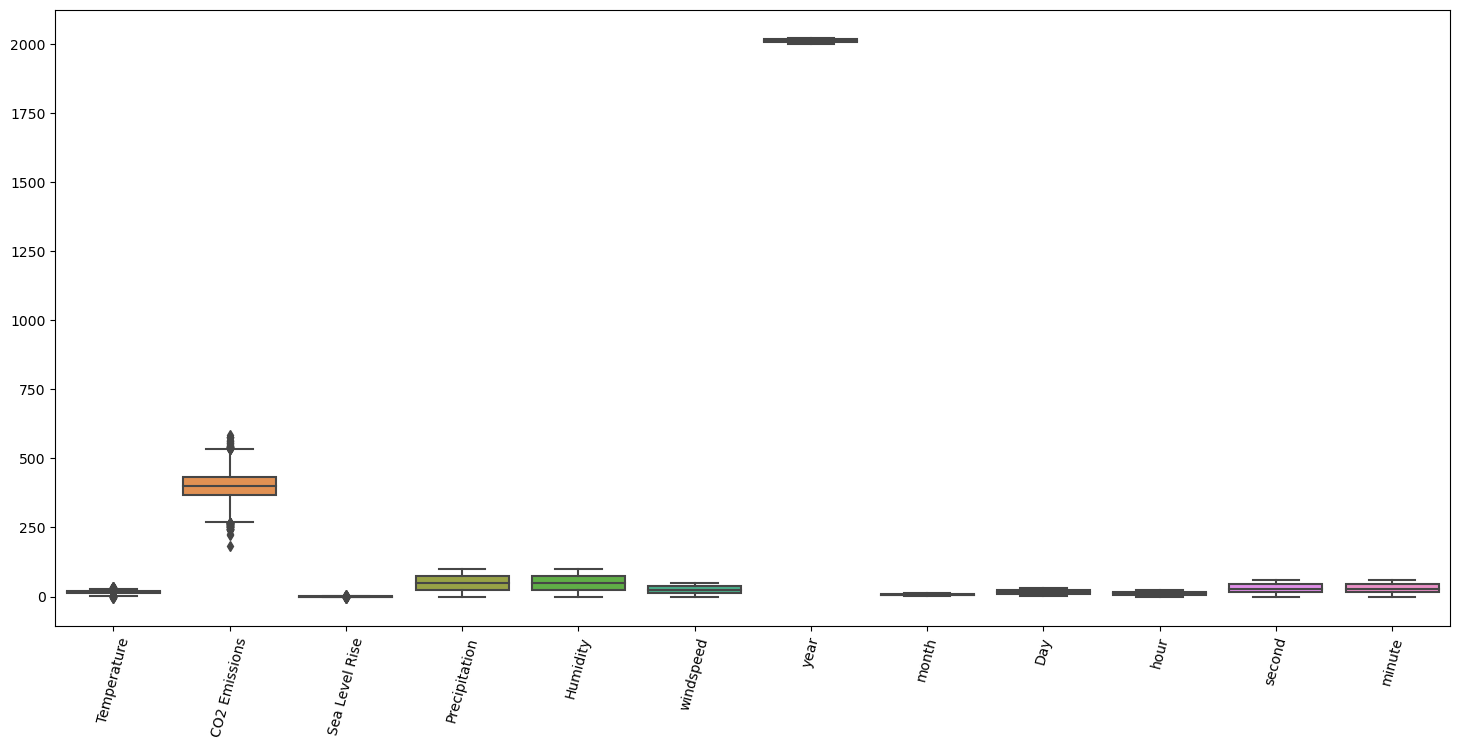

In [33]:
plt.figure(figsize=(18,8))
plt.xticks(rotation = 75)
sns.boxplot(data=data)
plt.show

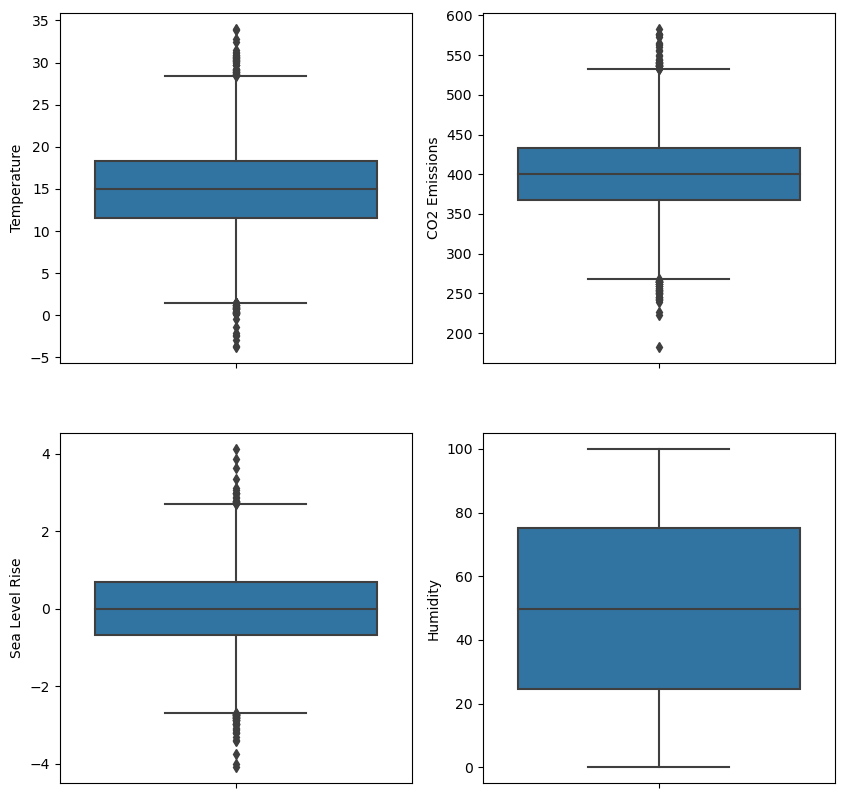

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=data,y='Temperature')

plt.subplot(2,2,2)
sns.boxplot(data=data,y='CO2 Emissions')

plt.subplot(2,2,3)
sns.boxplot(data=data,y='Sea Level Rise')

plt.subplot(2,2,4)
sns.boxplot(data=data,y='Humidity')

plt.show()

#### Line chart 

In [35]:
data.Country.value_counts()

Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: Country, Length: 243, dtype: int64

In [36]:
congo = data[data.Country == 'Congo']

In [37]:
congo

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,windspeed,year,month,Day,hour,second,minute
46,West Micheleland,Congo,19.859165,316.213133,0.836719,90.846961,7.654420,13.056320,2000,2,8,15,9,27
212,Loriport,Congo,12.773925,417.000452,-1.371936,57.610696,72.101049,48.918807,2000,6,27,2,50,20
239,Lake Michael,Congo,3.497068,386.602196,-0.696530,38.487516,56.338173,47.253384,2000,7,19,18,18,43
430,West Faith,Congo,25.779951,495.573067,-0.438887,86.959785,28.579845,45.712980,2000,12,27,5,1,40
480,Lake Leahburgh,Congo,30.554231,338.373171,-0.464692,66.163779,5.846293,46.685396,2001,2,7,5,3,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,Port Deborahville,Congo,18.784635,424.170939,-1.044590,80.086602,94.568447,15.921829,2021,4,28,10,7,3
9523,Floydbury,Congo,18.945991,423.552242,-0.898348,34.022207,84.172461,29.550211,2021,11,26,2,49,52
9619,Lake Jessica,Congo,25.615691,376.023605,-0.484357,86.299702,10.690664,10.199765,2022,2,14,18,1,26
9891,New Donald,Congo,15.946857,400.622551,0.597057,36.613858,24.519511,4.347717,2022,10,1,6,8,30


In [38]:
korea = data[data.Country == 'Korea']

In [39]:
korea

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,windspeed,year,month,Day,hour,second,minute
69,West Roberthaven,Korea,5.269831,413.862254,-1.198444,46.702809,29.621134,15.495185,2000,2,27,23,44,10
142,Lake Jacquelineton,Korea,19.804427,325.785385,1.117522,88.069054,76.890113,42.389260,2000,4,29,7,22,0
203,New Scottchester,Korea,15.686522,437.668021,-0.281736,11.405608,40.070034,12.763717,2000,6,19,12,21,53
269,New Meganport,Korea,13.985536,412.913175,-0.186333,22.164632,52.735063,1.571454,2000,8,13,23,56,34
831,Sharpmouth,Korea,6.335569,493.230237,-0.502311,80.566016,80.062493,42.893707,2001,11,29,2,7,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9079,South Laura,Korea,12.147583,362.947255,0.448722,51.353072,14.590204,3.247516,2020,11,18,2,42,56
9496,Myershaven,Korea,17.746987,415.010448,1.350369,34.437171,79.188936,8.518121,2021,11,3,10,21,30
9512,Port Amanda,Korea,13.567268,409.272797,-1.050709,26.250014,72.174617,43.141593,2021,11,16,21,53,5
9717,Reevesburgh,Korea,11.512881,481.159566,1.735910,33.038546,2.494816,31.218988,2022,5,8,2,41,18


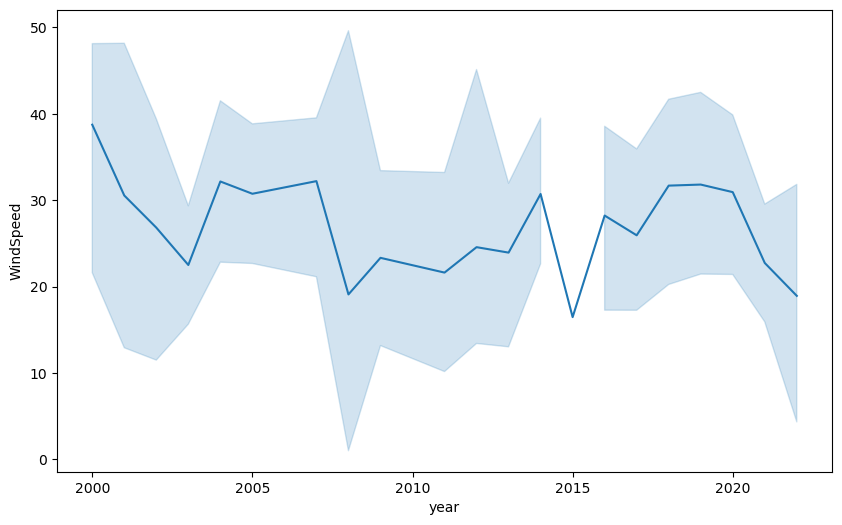

In [40]:
plt.figure(figsize=(10,6))
plt.xlabel('year')
plt.ylabel('WindSpeed')
sns.lineplot(data=congo,x='year',y='windspeed')
plt.show()

#### Reg plot 

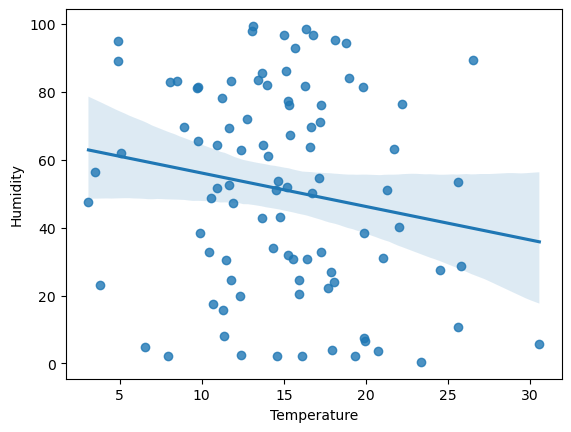

In [41]:
sns.regplot(data = congo, x = 'Temperature', y= 'Humidity')
plt.show()

#### KDE plot 

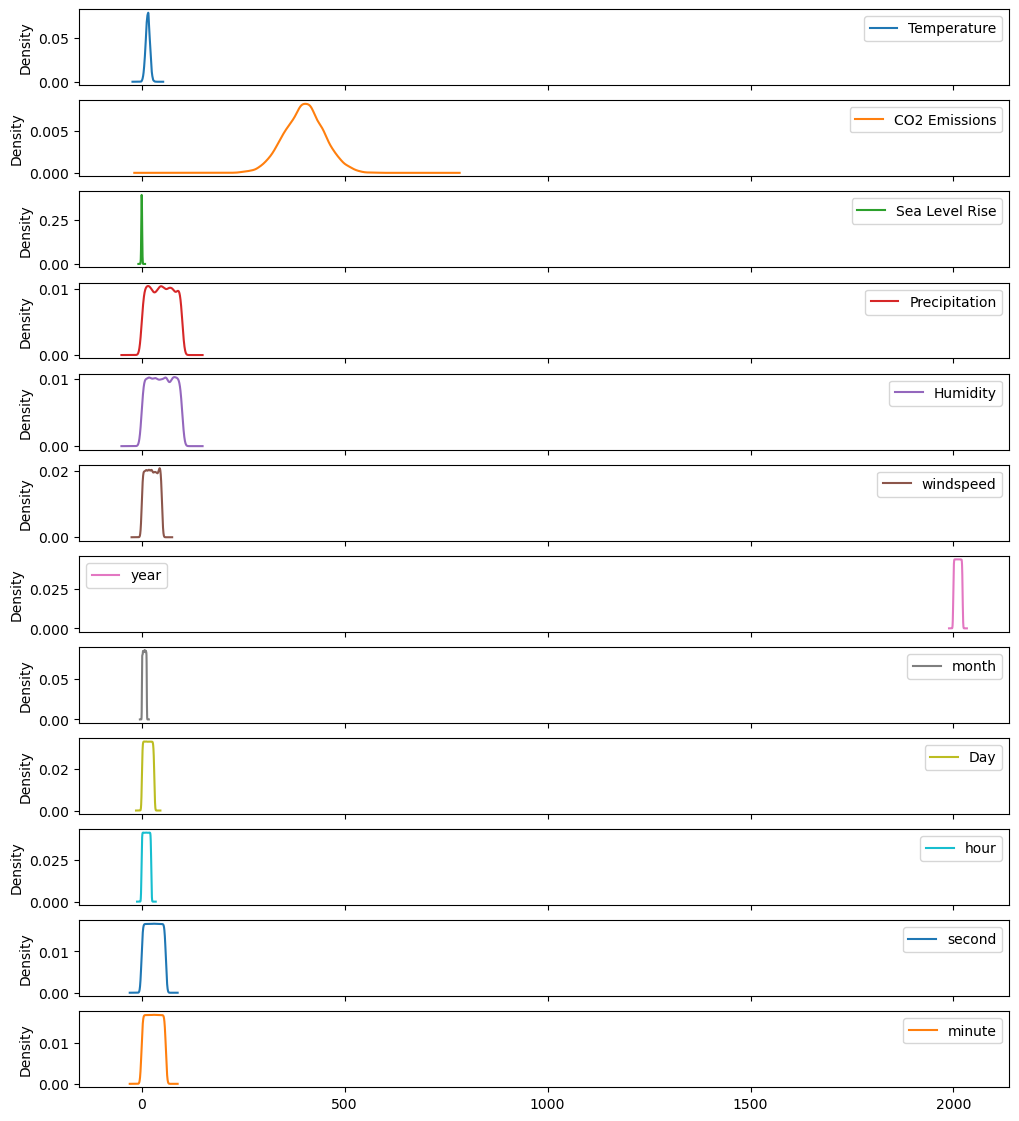

In [42]:
data.plot.kde(figsize=(12,14),subplots=True);

#### Relplot 

In [ ]:
sns.relplo